In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import pyltr
import matplotlib.pyplot as plt
from sklearn.datasets import dump_svmlight_file
from random import randint


In [18]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/New_train_set_full.csv")
train.head()

,Unnamed: 0,srch_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,starrating_diff,usd_diff,ad_vs_real,booked_percentage,clicked_percentage,avg_comp_rate,roomcount_bookwindow,adultcount_childrencount,bool_same_country,score
0,0,1,187,3.45,219,893,3,3.5,1,2.83,...,0.45,0.162292,-0.5,1.633987,2.614379,0.00,492,36,0,0
1,1,1,187,3.45,219,10404,4,4.0,1,2.20,...,0.55,0.049807,0.0,1.543739,2.572899,0.00,492,36,0,0
2,2,1,187,3.45,219,21315,3,4.5,1,2.20,...,0.45,0.072261,-1.5,0.362976,0.907441,0.00,492,36,0,0
3,3,1,187,3.45,219,27348,2,4.0,1,2.83,...,1.45,0.597623,-2.0,1.304348,2.391304,-0.75,492,36,0,0
4,4,1,187,3.45,219,29604,4,3.5,1,2.64,...,0.55,0.025435,0.5,3.609023,5.112782,0.00,492,36,0,0


In [19]:
train= train.drop(["Unnamed: 0"],axis=1)
train

,srch_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,starrating_diff,usd_diff,ad_vs_real,booked_percentage,clicked_percentage,avg_comp_rate,roomcount_bookwindow,adultcount_childrencount,bool_same_country,score
0,1,187,3.45,219,893,3,3.5,1,2.83,0.0438,...,0.45,0.162292,-0.5,1.633987,2.614379,0.000000,492,36,0,0
1,1,187,3.45,219,10404,4,4.0,1,2.20,0.0149,...,0.55,0.049807,0.0,1.543739,2.572899,0.000000,492,36,0,0
2,1,187,3.45,219,21315,3,4.5,1,2.20,0.0245,...,0.45,0.072261,-1.5,0.362976,0.907441,0.000000,492,36,0,0
3,1,187,3.45,219,27348,2,4.0,1,2.83,0.0125,...,1.45,0.597623,-2.0,1.304348,2.391304,-0.750000,492,36,0,0
4,1,187,3.45,219,29604,4,3.5,1,2.64,0.1241,...,0.55,0.025435,0.5,3.609023,5.112782,0.000000,492,36,0,0
5,1,187,3.45,219,30184,4,4.5,1,2.77,0.1302,...,0.55,0.108218,-0.5,2.177294,4.510109,0.000000,492,36,0,0
6,1,187,3.45,219,44147,3,3.5,1,2.20,0.0356,...,0.45,0.070762,-0.5,1.920000,2.740000,0.000000,492,36,0,0
7,1,187,3.45,219,50984,2,0.0,0,1.61,0.0690,...,1.45,0.251223,2.0,1.923077,1.923077,0.000000,492,36,0,0
8,1,187,3.45,219,53341,4,4.0,1,2.56,0.1238,...,0.55,0.006293,0.0,8.827238,11.727617,0.000000,492,36,0,0
9,1,187,3.45,219,56880,4,4.0,1,2.83,0.1028,...,0.55,0.265698,0.0,3.851852,5.629630,0.000000,492,36,0,0


### Modify the dataset for RandomForest regression and other standard ML algorithm

In [81]:
#Adding Score columns: 5 for booked, 1 clicked and 0 the rest
def assign_score(x):
    if x["booking_bool"]==1:
        val=10
    elif x["click_bool"]==1:
        val=1
    else:
        val=0
    return val
    

train['score'] = train.apply(assign_score , axis=1)


In [20]:
train.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance', 'starrating_diff',
       'usd_diff', 'ad_vs_real', 'booked_percentage', 'clicked_percentage',
       'avg_comp_rate', 'roomcount_bookwindow', 'adultcount_childrencount',
       'bool_same_country', 'score'],
      dtype='object')

In [83]:
#add month columns and drop some useless columns
train["date_time"] = pd.to_datetime(train["date_time"])
train["month"] = train["date_time"].dt.month
column_id=train["srch_id"]
train = train.drop(["srch_id", "date_time"], axis=1)

In [4]:
#columns with Nan
train.columns[train.isna().any()].tolist()

['gross_bookings_usd']

In [6]:
#fill Nan
train=train.drop("gross_bookings_usd",axis=1)
#values = {'visitor_hist_starrating': 0, 'visitor_hist_adr_usd': 0}
#train=train.fillna(value=values)
train.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'starrating_diff', 'usd_diff', 'booked_percentage',
       'clicked_percentage', 'avg_comp_rate', 'month', 'score'],
      dtype='object')

In [23]:
np.all(np.isfinite(train))

True

In [88]:
#there are some infinite values in usd_diff
train= train.replace([np.inf, -np.inf], np.nan)
train.columns[train.isna().any()].tolist()
train=train.fillna(value={"usd_diff":0})

In [22]:
len(train[train['prop_log_historical_price'] == 0.00].index.tolist())

713899

In [6]:
train["clicked_percentage"].quantile(0.25)

2.7397260273972597

### separate labels

In [50]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/New_train_set_full.csv")
train.head()


,Unnamed: 0,srch_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_location_score1,...,usd_diff,ad_vs_real,booked_percentage,clicked_percentage,avg_comp_rate,month,roomcount_bookwindow,adultcount_childrencount,bool_same_country,score
0,0,1,187,3.45,152.24,219,893,3,3.5,2.83,...,0.162292,-0.5,1.633987,2.614379,0.00,4,492,36,0,0
1,1,1,187,3.45,152.24,219,10404,4,4.0,2.20,...,0.049807,0.0,1.543739,2.572899,0.00,4,492,36,0,0
2,2,1,187,3.45,152.24,219,21315,3,4.5,2.20,...,0.072261,-1.5,0.362976,0.907441,0.00,4,492,36,0,0
3,3,1,187,3.45,152.24,219,27348,2,4.0,2.83,...,0.597623,-2.0,1.304348,2.391304,-0.75,4,492,36,0,0
4,4,1,187,3.45,152.24,219,29604,4,3.5,2.64,...,0.025435,0.5,3.609023,5.112782,0.00,4,492,36,0,0


In [21]:
train.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance', 'starrating_diff',
       'usd_diff', 'ad_vs_real', 'booked_percentage', 'clicked_percentage',
       'avg_comp_rate', 'roomcount_bookwindow', 'adultcount_childrencount',
       'bool_same_country', 'score'],
      dtype='object')

In [22]:
column_id=train["srch_id"]
train=train.drop(["srch_id","position","prop_id"], axis=1)

In [23]:
train.columns

Index(['visitor_location_country_id', 'visitor_hist_starrating',
       'prop_country_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance', 'starrating_diff',
       'usd_diff', 'ad_vs_real', 'booked_percentage', 'clicked_percentage',
       'avg_comp_rate', 'roomcount_bookwindow', 'adultcount_childrencount',
       'bool_same_country', 'score'],
      dtype='object')

In [24]:
y=train["score"]
X=train.drop("score", axis=1)

In [25]:
X.head()

,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,...,orig_destination_distance,starrating_diff,usd_diff,ad_vs_real,booked_percentage,clicked_percentage,avg_comp_rate,roomcount_bookwindow,adultcount_childrencount,bool_same_country
0,187,3.45,219,3,3.5,1,2.83,0.0438,4.95,104.77,...,1500.67,0.45,0.162292,-0.5,1.633987,2.614379,0.00,492,36,0
1,187,3.45,219,4,4.0,1,2.20,0.0149,5.03,170.74,...,1500.67,0.55,0.049807,0.0,1.543739,2.572899,0.00,492,36,0
2,187,3.45,219,3,4.5,1,2.20,0.0245,4.92,179.80,...,1500.67,0.45,0.072261,-1.5,0.362976,0.907441,0.00,492,36,0
3,187,3.45,219,2,4.0,1,2.83,0.0125,4.39,602.77,...,1500.67,1.45,0.597623,-2.0,1.304348,2.391304,-0.75,492,36,0
4,187,3.45,219,4,3.5,1,2.64,0.1241,4.93,143.58,...,1500.67,0.55,0.025435,0.5,3.609023,5.112782,0.00,492,36,0


In [26]:
X.columns[X.isna().any()].tolist()

[]

In [27]:
np.all(np.isfinite(X))

True

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13 )

In [71]:
regr = RandomForestRegressor(n_jobs=-1)
rfr = regr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
print(r2_score(prediction, y_test))


C:\Users\david\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-3.2198929894135464


In [28]:
column_id

0               1
1               1
2               1
3               1
4               1
5               1
6               1
7               1
8               1
9               1
10              1
11              1
12              1
13              1
14              1
15              1
16              1
17              1
18              1
19              1
20              1
21              1
22              1
23              1
24              1
25              1
26              1
27              1
28              4
29              4
            ...  
4957210    332784
4957211    332784
4957212    332784
4957213    332784
4957214    332784
4957215    332784
4957216    332784
4957217    332784
4957218    332784
4957219    332784
4957220    332784
4957221    332784
4957222    332784
4957223    332784
4957224    332784
4957225    332784
4957226    332784
4957227    332784
4957228    332784
4957229    332784
4957230    332784
4957231    332784
4957232    332784
4957233    332784
4957234   

In [43]:
prediction_s = pd.Series(prediction)


### ElasticNet

In [61]:
regr = ElasticNet(random_state=0, alpha=1e-05,l1_ratio=0.2)
trained_model_en=regr.fit(X_train, y_train)
y_pred_enet = trained_model_en.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print("r^2 on test data : %f" % r2_score_enet)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


r^2 on test data : 0.053496


In [45]:
column_id=new_test_set["srch_id"]
new_test_set_ready=new_test_set.drop("srch_id", axis=1)
new_test_set_ready=new_test_set_ready.drop("prop_id", axis=1)
new_test_set_ready.shape

(4959183, 27)

In [47]:
new_test_set_ready.columns

Index(['site_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'starrating_diff', 'usd_diff',
       'booked_perc', 'clicked_perc', 'avg_comp_rate', 'month'],
      dtype='object')

In [56]:
#X_train.shape
real_test_prediction= trained_model_en.predict(new_test_set_ready)


In [58]:
real_test_prediction

(4959183,)

In [58]:
alphas = np.logspace(-5, 1, 60)
enet = ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 1e-05


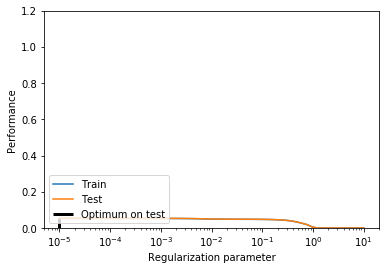

In [60]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

In [ ]:
#import real test set


### lambdaMART

In [29]:
#RUND THIS LINE only to save a new file in svm_light format
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining"+"/Full_train_forLM.txt")


In [94]:
#tran_LM=pd.read_table("C://Users//david\Desktop//VU amsterdam//Data mining/train_forLM.txt")

In [30]:
#function to read the svm_light file and split it in TRAIN and TEST
def get_data(file_loc):
    f_train= open("C://Users//david\Desktop//VU amsterdam//Data mining//Full_train_lm_split.txt","w+")
    f_test= open("C://Users//david\Desktop//VU amsterdam//Data mining//Full_validation_lm_split.txt","w+")
    f = open(file_loc, 'r')
    test_flag=False
    i=1
    previous_id=0
    for line in f:
        arr = line.split()
        ''' Get the score and query id '''
        score = arr[0]
        q_id = arr[1].split(':')[1]
        #print(q_id)
        if previous_id==0:
            f_train.write(line)
        elif previous_id == q_id:
            if test_flag:
                f_test.write(line)
            else:
                f_train.write(line)
        else:
            if i%9 == 0:
                test_flag=True
                f_test.write(line)
            else:
                test_flag=False
                f_train.write(line)
            i+=1
        previous_id=q_id

    f.close()
    f_train.close()
    f_test.close()

In [31]:
get_data("C://Users//david\Desktop//VU amsterdam//Data mining//Full_train_forLM.txt")


In [3]:
# TO RUN LambdaMART run this code (and the libraries above)
import pyltr
#train_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining//train_lm.txt")
#test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/test_lm.txt")
full_train=open("C://Users//david\Desktop//VU amsterdam//Data mining//Full_train_lm_split.txt")
full_valid=open("C://Users//david\Desktop//VU amsterdam//Data mining//Full_validation_lm_split.txt")
#TX, Ty, Tqids, _ = pyltr.data.letor.read_dataset(train_lm)
Train_features, Train_scores, Train_qids, _ = pyltr.data.letor.read_dataset(full_train)
#Test_features, Test_scores, Test_qids, _ = pyltr.data.letor.read_dataset(test_lm)
Val_features, Val_scores, Val_qids, _ = pyltr.data.letor.read_dataset(full_valid)

In [4]:
Train_features.shape
#Val_features.shape

(3966558, 27)

In [6]:
metric = pyltr.metrics.NDCG(k=5)

monitor = pyltr.models.monitors.ValidationMonitor(Val_features, Val_scores, Val_qids, metric=metric, stop_after=10)

model = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=200,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=15,
    min_samples_leaf=64,
    verbose=1,
)

In [7]:
#TRAIN
model.fit(Train_features, Train_scores, Train_qids, monitor=monitor)

 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.3431       0.2960      396.76m      C:      0.3405 B:      0.3405 S:  0
    2       0.3804       0.0373      401.23m      C:      0.3794 B:      0.3794 S:  0
    3       0.4021       0.0210      405.39m      C:      0.4010 B:      0.4010 S:  0
    4       0.4205       0.0188      412.54m      C:      0.4194 B:      0.4194 S:  0
    5       0.4263       0.0073      414.57m      C:      0.4271 B:      0.4271 S:  0
    6       0.4297       0.0026      412.51m      C:      0.4301 B:      0.4301 S:  0
    7       0.4344       0.0039      407.47m      C:      0.4332 B:      0.4332 S:  0
    8       0.4378       0.0027      416.66m      C:      0.4370 B:      0.4370 S:  0
    9       0.4412       0.0041      413.50m      C:      0.4412 B:      0.4412 S:  0
   10       0.4444       0.0037      409.70m      C:      0.4446 B:      0.4446 S:  0
   15       0.4532       0.0009      402.04m      C: 

In [23]:
Epred = model.predict(Test_features)
print ('Random ranking:', metric.calc_mean_random(Test_qids, Test_scores))
print ('Our model:', metric.calc_mean(Test_qids, Test_scores, Epred))

Random ranking: 0.22850953539318647
Our model: 0.5680370869528044


In [24]:
Epred

array([-0.1484142 ,  1.14482062, -0.52588722, ..., -0.02895467,
       -0.83267956,  1.47147386])

#### Extracting data from train (percentage book/click) and store it

In [8]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/training_set_VU_DM.csv")
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [40]:
hotel_quality = pd.DataFrame(train.prop_id.value_counts(dropna = False))
hotel_quality = hotel_quality.join(pd.DataFrame(train.prop_id[train.booking_bool == 1].value_counts().astype(int)), rsuffix = "book")
hotel_quality = hotel_quality.join(pd.DataFrame(train.prop_id[train.click_bool == 1].value_counts().astype(int)), rsuffix = "click")
hotel_quality.columns = ["counts", "booked", "clicked"]
hotel_quality["booked_percentage"] = hotel_quality.booked / hotel_quality.counts * 100
hotel_quality["clicked_percentage"] = hotel_quality.clicked / hotel_quality.counts * 100

In [41]:
hotel_quality = hotel_quality.fillna(value = {"booked_percentage": 0, "clicked_percentage": 0})


In [43]:
hotel_quality=hotel_quality.drop(["counts", "booked", "clicked"], axis=1)

In [46]:
hotel_quality.to_csv(path+"/hotel_quality.csv")

In [ ]:
hotel_quality.max()

### test on the test dataset to insert hotels_train quality

In [15]:
#load test set
test = pd.read_csv(path+"/test_set_VU_DM.csv")
test.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
hotels_train = pd.read_csv(path+"//hotel_quality.csv")
hotels_train.columns=["prop_id", "booked_perc", "clicked_perc"]

In [57]:
new_data_test = test.join(hotels_train.set_index("prop_id"),how="left", on="prop_id")

### How many hotels are in test but not in train? -> 121665 out of 129438

In [34]:
hotel_quality_test.index

Int64Index([104517, 124342,  68420, 134154,  59781,  40279, 137997,  60846,
            116942,  49656,
            ...
             88165,   2915,  99234, 122755,  41332,   6221,  15205,  29038,
             24940,  82669],
           dtype='int64', length=129438)

In [33]:
hotel_quality_test.index.intersection(hotel_quality.index)

Int64Index([104517, 124342,  68420, 134154,  59781,  40279, 137997,  60846,
            116942,  49656,
            ...
            133923,  76615,  93007,  62348,  77677,  88165,  99234,  41332,
             29038,  24940],
           dtype='int64', length=121665)

### Test on real test set

In [33]:
train.columns

Index(['visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance',
       'starrating_diff', 'usd_diff', 'ad_vs_real', 'booked_percentage',
       'clicked_percentage', 'avg_comp_rate', 'month', 'roomcount_bookwindow',
       'adultcount_childrencount', 'bool_same_country', 'score'],
      dtype='object')

In [47]:
new_test_set.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance',
       'starrating_diff', 'usd_diff', 'ad_vs_real', 'booked_perc',
       'clicked_perc', 'avg_comp_rate', 'month', 'roomcount_bookwindow',
       'adultcount_childrencount', 'bool_same_country'],
      dtype='object')

In [4]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
new_test_set = pd.read_csv(path+"/New_test_set_full.csv")
new_test_set.head()

,Unnamed: 0,srch_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,orig_destination_distance,starrating_diff,usd_diff,ad_vs_real,booked_perc,clicked_perc,avg_comp_rate,roomcount_bookwindow,adultcount_childrencount,bool_same_country
0,0,1,216,3.43,219,3180,3,4.5,1,2.94,...,1517.5625,0.43,0.104550,-1.5,4.301075,4.301075,0.0,508,18,0
1,1,1,216,3.43,219,5543,3,4.5,1,2.64,...,1517.5625,0.43,0.108215,-1.5,5.327869,6.147541,0.0,508,18,0
2,2,1,216,3.43,219,14142,2,3.5,1,2.71,...,1517.5625,1.43,0.489901,-1.5,1.342282,2.684564,0.5,508,18,0
3,3,1,216,3.43,219,22393,3,4.5,1,2.40,...,1517.5625,0.43,0.024761,-1.5,1.379310,1.379310,0.0,508,18,0
4,4,1,216,3.43,219,24194,3,4.5,1,2.94,...,1517.5625,0.43,0.282470,-1.5,1.463415,1.951220,0.0,508,18,0


In [5]:
#new_test_set = new_test_set.fillna(value = {"booked_perc": 2.89, "clicked_perc": 5.01})
new_test_set = new_test_set.drop("Unnamed: 0", axis=1)
#new_test_set = new_test_set.drop("random_bool", axis=1)
new_test_set

,srch_id,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,orig_destination_distance,starrating_diff,usd_diff,ad_vs_real,booked_perc,clicked_perc,avg_comp_rate,roomcount_bookwindow,adultcount_childrencount,bool_same_country
0,1,216,3.43,219,3180,3,4.5,1,2.94,0.0691,...,1517.5625,0.43,0.104550,-1.5,4.301075,4.301075,0.000000,508,18,0
1,1,216,3.43,219,5543,3,4.5,1,2.64,0.0843,...,1517.5625,0.43,0.108215,-1.5,5.327869,6.147541,0.000000,508,18,0
2,1,216,3.43,219,14142,2,3.5,1,2.71,0.0556,...,1517.5625,1.43,0.489901,-1.5,1.342282,2.684564,0.500000,508,18,0
3,1,216,3.43,219,22393,3,4.5,1,2.40,0.0561,...,1517.5625,0.43,0.024761,-1.5,1.379310,1.379310,0.000000,508,18,0
4,1,216,3.43,219,24194,3,4.5,1,2.94,0.2090,...,1517.5625,0.43,0.282470,-1.5,1.463415,1.951220,0.000000,508,18,0
5,1,216,3.43,219,28181,3,4.5,1,2.30,0.1826,...,1517.5625,0.43,0.255043,-1.5,7.500000,8.055556,0.000000,508,18,0
6,1,216,3.43,219,34263,3,4.5,1,3.09,0.1300,...,1517.5625,0.43,0.282470,-1.5,3.208556,3.208556,0.000000,508,18,0
7,1,216,3.43,219,37567,2,4.5,0,2.83,0.0138,...,1517.5625,1.43,0.460766,-2.5,1.257862,1.257862,1.000000,508,18,0
8,1,216,3.43,219,50162,2,3.5,1,2.20,0.0808,...,1517.5625,1.43,0.481214,-1.5,3.424658,4.109589,-0.500000,508,18,0
9,1,216,3.43,219,54937,3,4.0,1,2.08,0.1649,...,1517.5625,0.43,0.259452,-1.0,5.089059,5.852417,0.000000,508,18,0


In [6]:
new_test_set.columns[new_test_set.isna().any()].tolist()

[]

In [9]:
new_test_set.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance', 'starrating_diff',
       'usd_diff', 'ad_vs_real', 'booked_perc', 'clicked_perc',
       'avg_comp_rate', 'roomcount_bookwindow', 'adultcount_childrencount',
       'bool_same_country'],
      dtype='object')

In [10]:
column_id=new_test_set["srch_id"]
X=new_test_set.drop(["srch_id", "prop_id"], axis=1)
X.head()

,visitor_location_country_id,visitor_hist_starrating,prop_country_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,...,orig_destination_distance,starrating_diff,usd_diff,ad_vs_real,booked_perc,clicked_perc,avg_comp_rate,roomcount_bookwindow,adultcount_childrencount,bool_same_country
0,216,3.43,219,3,4.5,1,2.94,0.0691,5.03,119.0,...,1517.5625,0.43,0.104550,-1.5,4.301075,4.301075,0.0,508,18,0
1,216,3.43,219,3,4.5,1,2.64,0.0843,4.93,118.0,...,1517.5625,0.43,0.108215,-1.5,5.327869,6.147541,0.0,508,18,0
2,216,3.43,219,2,3.5,1,2.71,0.0556,4.16,49.0,...,1517.5625,1.43,0.489901,-1.5,1.342282,2.684564,0.5,508,18,0
3,216,3.43,219,3,4.5,1,2.40,0.0561,5.03,143.0,...,1517.5625,0.43,0.024761,-1.5,1.379310,1.379310,0.0,508,18,0
4,216,3.43,219,3,4.5,1,2.94,0.2090,4.72,79.0,...,1517.5625,0.43,0.282470,-1.5,1.463415,1.951220,0.0,508,18,0


In [11]:
X.shape

(4958275, 25)

In [12]:
y = [np.random.randint(0, 5) for p in range(0, X.shape[0])]
#X.columns

In [56]:
len(y)

4958275

In [14]:
#np.all(np.isfinite(X))
#X= X.replace([np.inf, -np.inf], np.nan)
#X = X.fillna(value = {"month": 1,"avg_comp_rate": 0}) 
X.columns[X.isna().any()].tolist()


[]

In [13]:
#X= X.replace(-np.Inf, np.nan)
np.all(np.isfinite(X))

True

In [17]:
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining//Preprocessed_test_set.txt")

In [8]:
real_test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/Preprocessed_test_set.txt")
Test_features_r, Test_scores_r, Test_qids_r, _ = pyltr.data.letor.read_dataset(real_test_lm)
real_test_lm.close()


In [9]:
len(Test_features_r)

4959183

In [16]:
len(Test_qids_r)

4959183

In [17]:
len(new_test_set["srch_id"])

4959183

In [10]:
# PREDICT REAL DEAL
Epred_r = model.predict(Test_features_r)

In [29]:
len(Epred_r)

4959183

In [4]:
np.savetxt("data/Predictions.txt", Epred_r, fmt='%f')

NameError: name 'Epred_r' is not defined

In [14]:
Epred_r= np.loadtxt("predictions_new_scoring.txt" )

In [12]:
len(Epred_r)

4959183

In [13]:
predictions_df=pd.DataFrame(Epred_r)
#submiss_test_set= predictions_df
submiss_test_set=pd.DataFrame(new_test_set["srch_id"])
submiss_test_set.columns=["srch_id"]
submiss_test_set["ranking"] = predictions_df
submiss_test_set["prop_id"]=new_test_set["prop_id"]
submiss_test_set.head()

,srch_id,ranking,prop_id
0,1,-0.039472,3180
1,1,0.352098,5543
2,1,-0.694137,14142
3,1,-1.237896,22393
4,1,-0.325456,24194


In [ ]:
#submission_results=submission_results.drop("ranking", axis=1)


In [ ]:
#submission_results.to_csv(path+"/submission_test_set.csv")

In [14]:
test_set_submission_result=submiss_test_set.groupby(["srch_id"]).apply(lambda x: x.sort_values(["ranking"], ascending=False)).reset_index(drop=True)
test_set_submission_result=test_set_submission_result.drop("ranking", axis=1)
test_set_submission_result.to_csv("RESULT_to_submit_new_scoring.csv",  index=False)

In [18]:
test_set_submission_result.head()

,srch_id,prop_id
0,1,5543
1,1,28181
2,1,99484
3,1,54937
4,1,3180


### TEST changing the score for the trainign set

In [6]:
#run the first cells
train.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'gross_bookings_usd', 'starrating_diff', 'usd_diff',
       'booked_percentage', 'clicked_percentage', 'avg_comp_rate', 'month',
       'score'],
      dtype='object')

In [7]:
def assign_score(x):
    pos= x["position"]
    if pos==1:
        val=5
    elif pos ==2:
        val=4
    elif pos >= 3 and pos <= 5:
        val=3
    elif pos >=6 and pos <=10:
        val=2
    else:
        val=1
    return val
    

train['score_position'] = train.apply(assign_score , axis=1)

In [12]:
train["new_score"]=train.apply(lambda row: (row["score"]+row["score_position"]), axis=1)

In [16]:
train.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score,score_position,new_score
0,1,12,187,3.45,152.24,219,893,3,3.5,1,...,NaN,0.45,0.162292,1.633987,2.614379,0.00,4,0,1,1.0
1,1,12,187,3.45,152.24,219,10404,4,4.0,1,...,NaN,0.55,0.049807,1.543739,2.572899,0.00,4,0,1,1.0
2,1,12,187,3.45,152.24,219,21315,3,4.5,1,...,NaN,0.45,0.072261,0.362976,0.907441,0.00,4,0,1,1.0
3,1,12,187,3.45,152.24,219,27348,2,4.0,1,...,NaN,1.45,0.597623,1.304348,2.391304,-0.75,4,0,1,1.0
4,1,12,187,3.45,152.24,219,29604,4,3.5,1,...,NaN,0.55,0.025435,3.609023,5.112782,0.00,4,0,3,3.0


In [17]:
y=train["new_score"]
column_id=train["srch_id"]
X=train.drop(["score","position","score_position","srch_id"] , axis=1)
X.shape

(4958347, 30)

In [20]:
X=X.drop(["new_score","prop_id","gross_bookings_usd"], axis=1)
X.shape

(4958347, 27)

In [21]:
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining//other_datasets_trying//Preprocessed_train_set.txt")

### Plot features importance

In [7]:
path="C://Users//david//Downloads"
train = pd.read_csv(path+"/New_test_set.csv")
train.head()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,random_bool,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,0,1,24,216,3.43,151.39,219,3180,3,4.5,...,1,0,-326.5675,0,0.43,0.104550,4.301075,4.301075,0.0,2
1,1,1,24,216,3.43,151.39,219,5543,3,4.5,...,1,0,-326.5675,0,0.43,0.108215,5.327869,6.147541,0.0,2
2,2,1,24,216,3.43,151.39,219,14142,2,3.5,...,1,0,-326.5675,0,1.43,0.489901,1.342282,2.684564,0.5,2
3,3,1,24,216,3.43,151.39,219,22393,3,4.5,...,1,0,-326.5675,0,0.43,0.024761,1.379310,1.379310,0.0,2
4,4,1,24,216,3.43,151.39,219,24194,3,4.5,...,1,0,-326.5675,0,0.43,0.282470,1.463415,1.951220,0.0,2


In [18]:
variables=train.columns.tolist()
#print(len(variables))
features_list = [e for e in variables if e not in ('Unnamed: 0','srch_id','site_id','prop_id')]
#variables=variables.remove('Unnamed: 0','srch_id','site_id','prop_id')
features_list

['visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'random_bool',
 'starrating_diff',
 'usd_diff',
 'booked_perc',
 'clicked_perc',
 'avg_comp_rate',
 'month']

In [19]:
values_features=[0.0115, 0.01144, 0.00656, 0.0173, 0.0159, 0.0237, 
                0.0227, 0.0068, 0.0573, 0.0926, 0.0895, 0.1053, 
                0.0121, 0.0230, 0.0228, 0.0378, 0.0062, 0.0057,
                0.0015, 0.0034, 0.0486, 0.0148, 0.0607, 0.1371,
                0.1471, 0.0108, 0.0066]

In [20]:
indices = np.argsort(values_features)[::-1]

In [21]:
indices

array([24, 23, 11,  9, 10, 22,  8, 20, 15,  5, 13, 14,  6,  3,  4, 21, 12,
        0,  1, 25,  7, 26,  2, 16, 17, 19, 18], dtype=int64)

In [22]:
print(indices)
features_indexs=[]
combinatio=dict(zip(range(0,len(features_list)),features_list))
indices=indices.tolist()
for i in range(0,len(indices)):
    a=indices.pop()
    feature=combinatio[a]
    #print(feature)
    features_indexs.append(feature)
features_indexs=features_indexs[::-1]
print(features_indexs)

[24 23 11  9 10 22  8 20 15  5 13 14  6  3  4 21 12  0  1 25  7 26  2 16
 17 19 18]
['clicked_perc', 'booked_perc', 'promotion_flag', 'prop_log_historical_price', 'price_usd', 'usd_diff', 'prop_location_score2', 'random_bool', 'srch_adults_count', 'prop_review_score', 'srch_length_of_stay', 'srch_booking_window', 'prop_brand_bool', 'prop_country_id', 'prop_starrating', 'starrating_diff', 'srch_destination_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'avg_comp_rate', 'prop_location_score1', 'month', 'visitor_hist_adr_usd', 'srch_children_count', 'srch_room_count', 'srch_query_affinity_score', 'srch_saturday_night_bool']


In [32]:
values_features=np.array(values_features)

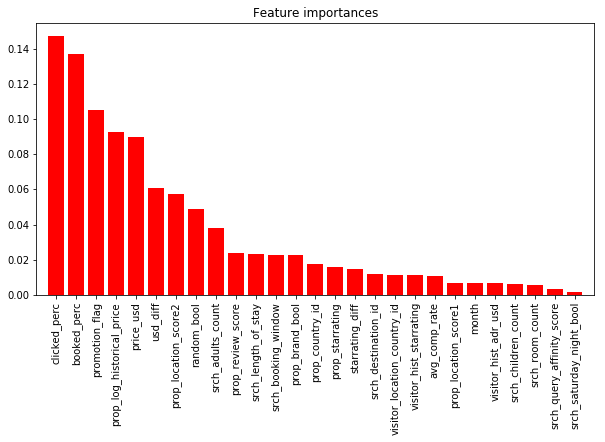

In [34]:
indices = np.argsort(values_features)[::-1]
#print(X_train.shape[1])
#print(len(features_indexs))
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(len(features_indexs)), values_features[indices], color="r", align="center")
plt.xticks(range(len(features_indexs)), features_indexs,rotation='vertical')
plt.xlim([-1, len(features_indexs)])
plt.show()